# Wine Quaity Prediction :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
#loading the dataset to a Pandas DataFrame
wine_dataset = pd.read_csv('winequality-red.csv')

In [4]:
# it will show the number of rows & columns in the dataset
wine_dataset.shape

(1599, 12)

In [5]:
# for practice we will check first 5 rows
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
#now we will check missing values 
wine_dataset.isnull().sum()
#it have no null value then its op 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

 ## Data Analysis and Visulaization

In [7]:
#it will give some main statistical measures of the dataset : 
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


* it helped us to see what is the range we are having in eaach column 

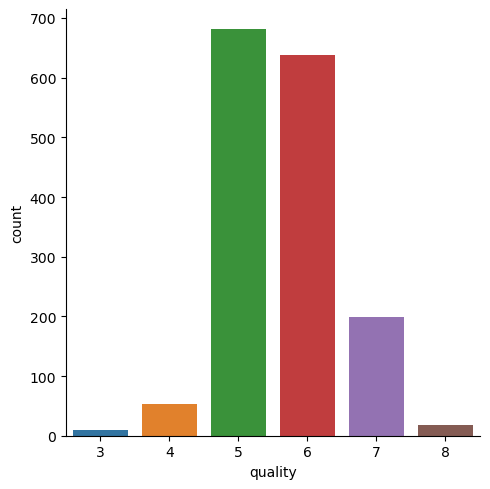

In [8]:
# number of values for each quality 
#for this we will use seaborn 
sns.catplot(x="quality",data = wine_dataset , kind = 'count')

* now we will do some more analysis which will help us to know what what values are related to quality 

<Axes: xlabel='quality', ylabel='citric acid'>

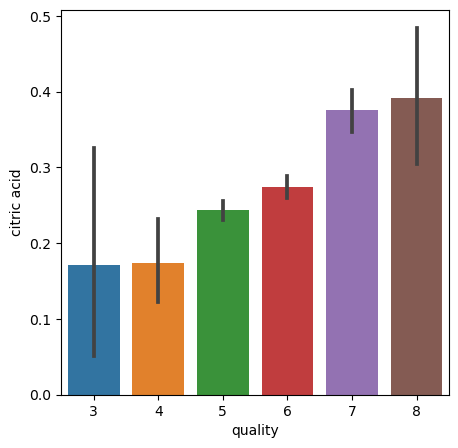

In [9]:
#now citric acid with Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality' ,y='citric acid', data=wine_dataset)


<Axes: xlabel='quality', ylabel='volatile acidity'>

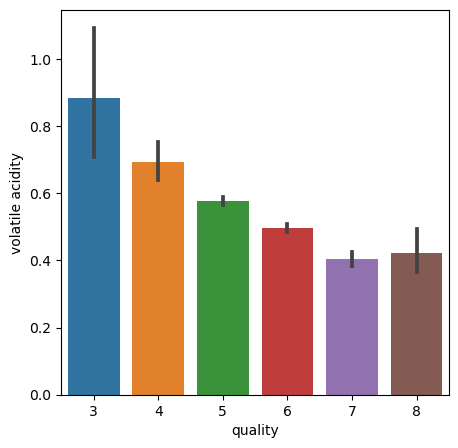

In [10]:
#volatile acidity with Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality' ,y='volatile acidity', data=wine_dataset)

* it is opposite to previous one

* so what we get to know from these two graph is :
    if the citric acid content is more then we are getting high quality wine 
    and in case of volatile acidity :
        if we get high level of acidity it will make low quality of wine

* lets try on other columns too

* lets take chlorides

<Axes: xlabel='quality', ylabel='chlorides'>

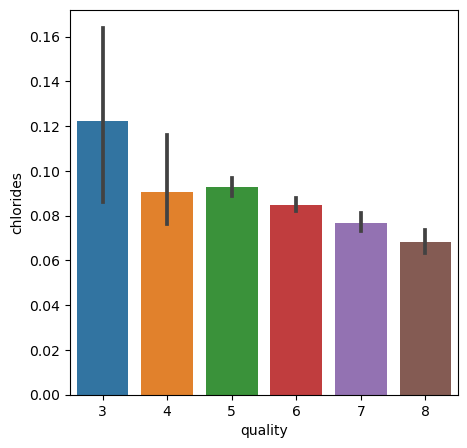

In [11]:
#chlorides vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality' ,y='chlorides', data=wine_dataset)

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

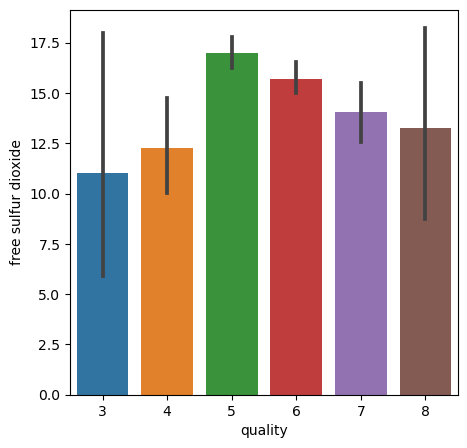

In [12]:
#free sulphur dioxide vs Quality 
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality' ,y='free sulfur dioxide', data=wine_dataset)


now we have to get to know which columns are directly or indirectly to Quality 

# Correlation

In [13]:
#Now we are going to coreelate all the columns 
correlation = wine_dataset.corr()

* there are two types :
    * Positive Correlation ,
    * Negative Coreelation

<Axes: >

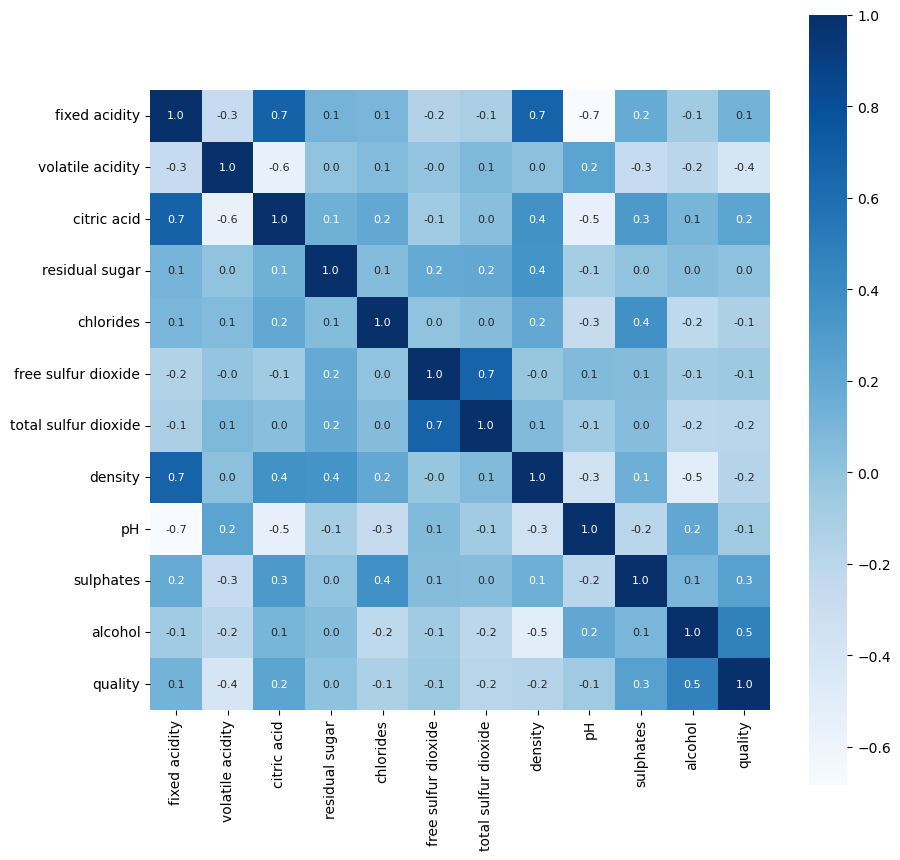

In [14]:
#constructu=ing a heatmap to understand the correlation between the columns
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar = True,square=True , fmt = ".1f" , annot = True , annot_kws={'size':8}, cmap ='Blues')

   * it will find all the propesnality value b/w all the values : correlation

* fmt : floating value 

* darker the color more related those values are

* lighter the color then they are negativey correlated 

# Data Preprocessing

In [15]:
# now we are going to seperate the data and Label 
X = wine_dataset.drop('quality',axis=1)

In [16]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

* Label Binarization : 


In [17]:
Y = wine_dataset['quality'].apply(lambda y_value : 1 if y_value>=7 else 0)

In [18]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


* Train and Test Split

In [19]:
X_train , X_test , Y_train , Y_test = train_test_split( X, Y, test_size=0.2, random_state=2)

In [20]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1599,) (1279,) (320,)


* Model Training :
Random Forest Classfier 

In [21]:
model = RandomForestClassifier()

In [22]:
model.fit(X_train, Y_train)

RandomForestClassifier()

* Model Evaluation 

Accuracy Score

In [23]:
# accuracy on tes data
X_test_prediction = model.predict(X_test)
test_data_acc = accuracy_score(X_test_prediction , Y_test)

In [24]:
print("Accuracy : " , test_data_acc)

Accuracy :  0.921875


0.925 means our model can predict with accuracy of 92.5%

* Building a Predictive System

In [25]:
input_data = (7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5)

# now we are changing the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#now we will reshape the data as we are predicting the label for only one instance 
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
    print("Good Quality Wine")
else:
    print("Bad Quality Wine")


[0]
Bad Quality Wine


C:\Users\TANISH\anaconda33\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [110]:
input_data1 = (7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5)

# now we are changing the input data to numpy array
input_data_as_numpy_array1 = np.asarray(input_data1)

#now we will reshape the data as we are predicting the label for only one instance 
input_data_reshaped1 = input_data_as_numpy_array1.reshape(1,-1)

prediction1 = model.predict(input_data_reshaped1)
print(prediction1)

if (prediction1[0]==1):
    print("Good Quality Wine")
else:
    print("Bad Quality Wine")

[1]
Good Quality Wine


C:\Users\TANISH\anaconda33\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


* As we can see we got our prediction for the above code 
* now we can use this model to predict different predictions 
